# Detecting Insults in Social Commentary

## 1. Business Understanding

### 1.1 Project description
Analyzing data related to insults found in social commentary to provide valuable insights into the use of language, sentiment, and discourse patterns in online discussions. 

Predict whether a comment posted during a public discussion is considered insulting to one of the participants.

### 1.2 Project objectives
- To provide valuable insights into the use of language, sentiment, and discourse patterns in online discussions.
- To classify into insults and not insults
- To conduct a basic frequency analysis to identify the most common insults used in social commentary. This can help pinpoint which insults are more prevalent.

## 2. Data Understanding

### 2.1. Importing the data

    Insult             Date                                            Comment
0        1  20120618192155Z                               "You fuck your dad."
1        0  20120528192215Z  "i really don't understand your point.\xa0 It ...
2        0              NaN  "A\\xc2\\xa0majority of Canadians can and has ...
3        0              NaN  "listen if you dont wanna get married to a man...
4        0  20120619094753Z  "C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...
5        0  20120620171226Z  "@SDL OK, but I would hope they'd sign him to ...
6        0  20120503012628Z                      "Yeah and where are you now?"
7        1              NaN  "shut the fuck up. you and the rest of your fa...
8        1  20120502173553Z  "Either you are fake or extremely stupid...may...
9        1  20120620160512Z  "That you are an idiot who understands neither...
10       0  20120620015140Z  "@jdstorm dont wish him injury but it happened...
11       0  20120530044519Z  "Be careful,Jimbo.OG ha

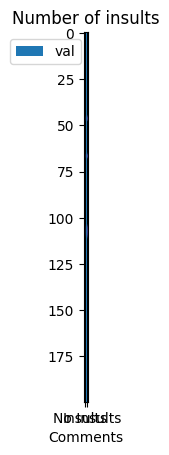

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yahbo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yahbo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['fuck', 'dad'], ['either', 'fake', 'extrem', 'stupid', 'mayb'], ['idiot', 'understand', 'neither', 'taxat', 'women', 'health'], ['reason', 'u', 'sound', 'retard', 'lol', 'damn', 'u', 'negro'], ['racist', 'screen', 'namenny', 'pieceofshit'], ['dickhead'], ['retard', 'go', 'post', 'head'], ['allinit123', 'yourxa0hypocrisyxa0i', 'sicken', 'ignor', 'loser'], ['ca', 'nt', 'believ', 'stupid', 'peopl', 'thi', 'site', 'idea', 'go', 'onxa0', 'foolsxa0', 'use', 'idiotsxa0', 'hide', 'truth', 'becaus', 'fool', 'protect', 'would', 'look', 'like', 'use', 'idiot'], ['fuck', 'behav', 'prick'], ['sum', 'total', 'ani', 'convers', 'first', 'abus', 'call', 'troll', 'typic', 'socialist', 'idiot', 'keep', 'non', 'exist', 'class', 'warfar', 'pointless'], ['faggot'], ['aimless', 'abe', 'delus', 'weirdo', 'lock', 'insid', 'kept', 'away', 'computersxa0', 'anyon', 'doubt', 'lunaci', 'abe', 'moron', 'prog', 'frog', 'nyc', 'pleas', 'read', 'thi', 'thread', 'see', 'abe', 'complet', 'come', 'apart', 'seam', 'go', 

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# 1. Load Data
df = pd.read_csv('../data/train.csv')

# 2. Data Exploration
# 2.1 Data Head
print(df.head(20))

# 2.2.1 Columns description
num = df['Insult'].value_counts()
print(num)

plot = pd.DataFrame({'Comments': ['Insults', 'No Insults'], 'val': [num[0], num[1]]})
ax = plot.plot.bar(title='Number of insults', x='Comments', y='val', rot=0)

# 3. Data Preparation and Pre-processing
# 3.1 Data Cleaning and Filtering
df.dropna(inplace=True)
filtered_df = df[df['Insult'] != 0]
print(filtered_df.head(20))

# 3.2 Data Visualization (Wordcloud)
text = filtered_df['Comment'].to_string(index=False)
processed_text = re.sub(r'\bxa0\b', '', text)

wordcloud = WordCloud(max_words=25, min_word_length=3).generate(processed_text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

# 3.3 Data Transformation (Tokenization and Text Preprocessing)
nltk.download('punkt')
nltk.download('stopwords')

token_arr = []
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

for text in filtered_df['Comment'].values:
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens]
    tokens = [stemmer.stem(token) for token in tokens]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = list(filter(None, tokens))
    token_arr.append(tokens)

print(token_arr)

# 3.4 Data Reduction using Random Sampling
reduced_data = filtered_df.sample(100)
print(reduced_data.head(20))

# 3.5 Feature Selection (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df["Comment"])
print(tfidf_matrix)

# 4. Modeling